# Analyse et détection de la dépression

In [3]:
#package et chargement fichiers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [4]:
demo = pd.read_csv("D:/git-projets/Depression-analysis/Demographic_symptom.csv", index_col = 0)


nettoyage des données

In [5]:
"""
intervalle de score attendus :

shaps : 14 à 56
psqi 0 à 21
madrs : 0 à 60
hamd 17 : 0 à 52
hamd 21 : 0 à 60
ham-a : 0 à 56
poms-tension : 0à 36
poms-depression : 0 à 60
poms-agressivité : 0 à48 
poms-fatigue : 0 à 28
poms-relation-pers : 0 à 28
poms-confusion : 0 à 28
poms-vigueur : 0 à 32
poms-total : -32 à 68
qids_sleep_score : 0 à 3
qids_appetite_score : 0 à 3
qids_psychomotor_score : 0 à 3
qids_total : 0 à 27

"""
#exploration
#afficher le détail du df
print(demo.head)
print(demo.info())


<bound method NDFrame.head of       batch   age     sex Diag  \
AA003   1st  45.0  Female   HC   
AA101   3rd  26.0  Female   HC   
AA115   1st  44.0  Female   HC   
AA296   2nd  27.0    Male   HC   
AA328   1st  51.0    Male  MDD   
...     ...   ...     ...  ...   
AN466   4th  28.0    Male  MDD   
AN736   4th  22.0  Female  MDD   
AN965   4th  29.0    Male  MDD   
AO427   4th  26.0    Male  MDD   
AO507   4th  23.0    Male  MDD   

                                     PrimaryDiagnosis  hs-CRP  shaps_score  \
AA003                      Healthy_Control,_High_Risk    0.40         25.0   
AA101                                 Healthy_Control     NaN         15.0   
AA115                                 Healthy_Control    6.90         16.0   
AA296                                 Healthy_Control    0.60         14.0   
AA328  Major_Depressive_Disorder,_Recurrent,_Moderate    1.60         24.0   
...                                               ...     ...          ...   
AN466          

In [7]:
#redéfinir le nom de la colonne hs-CRP
demo.rename(columns={'hs-CRP': 'hs_CRP'}, inplace=True)


In [8]:

#filtre des valeurs abberrantes

shaps_filter = (demo.shaps_score >= 14) & (demo.shaps_score <= 56)
psqi_filter = demo.psqi_score <= 21
madrs_filter = demo.madrs_score <= 60
hamd17_filter = demo.hamd_hamd17_score <= 52
hamd21_filter = demo.hamd_hamd21_score <= 60
hama_filter = demo.hama_score <= 56
poms_filter_tension = demo.poms_score_tension <= 36
poms_filter_depression = demo.poms_score_depression <= 60
poms_filter_anger = demo.poms_score_anger <= 48
poms_filter_fatigue = demo.poms_score_fatigue <= 28
poms_filter_friendliness = demo.poms_score_friendliness<=28
poms_filter_confusion = demo.poms_score_confusion <= 28
poms_filter_vigour = demo.poms_score_vigour <= 32
poms_filter_tmd = (demo.poms_score_tmd >= -32) & (demo.poms_score_tmd <= 168)
qids_sleep_filter = demo.qids_sleep_score <= 3
qids_appetite_filter = demo.qids_appetite_score <= 3
qids_psychomotor_filter = demo.qids_psychomotor_score <= 3
qids_filter = demo.qids_score <= 27
MADRS_Q1_filter = (demo.MADRS_Q1 >= 0) & (demo.MADRS_Q1 <= 6)
MADRS_Q2_filter = (demo.MADRS_Q2 >= 0) & (demo.MADRS_Q2 <= 6)
MADRS_Q3_filter = (demo.MADRS_Q3 >= 0) & (demo.MADRS_Q3 <= 6)
MADRS_Q4_filter = (demo.MADRS_Q4 >= 0) & (demo.MADRS_Q4 <= 6)
MADRS_Q5_filter = (demo.MADRS_Q5 >= 0) & (demo.MADRS_Q5 <= 6)
MADRS_Q6_filter = (demo.MADRS_Q6 >= 0) & (demo.MADRS_Q6 <= 6)
MADRS_Q7_filter = (demo.MADRS_Q7 >= 0) & (demo.MADRS_Q7 <= 6)
MADRS_Q8_filter = (demo.MADRS_Q8 >= 0) & (demo.MADRS_Q8 <= 6)
MADRS_Q9_filter = (demo.MADRS_Q9 >= 0) & (demo.MADRS_Q9 <= 6)
MADRS_Q10_filter = (demo.MADRS_Q10 >= 0) & (demo.MADRS_Q10 <= 6)

all_filter_abber = shaps_filter & psqi_filter & madrs_filter & hamd17_filter & hamd21_filter & hama_filter & poms_filter_tension & poms_filter_depression & poms_filter_anger & poms_filter_fatigue & poms_filter_friendliness & poms_filter_confusion & poms_filter_vigour & poms_filter_tmd & qids_sleep_filter & qids_appetite_filter & qids_psychomotor_filter & qids_filter & MADRS_Q1_filter & MADRS_Q2_filter & MADRS_Q3_filter & MADRS_Q4_filter & MADRS_Q5_filter & MADRS_Q6_filter & MADRS_Q7_filter & MADRS_Q8_filter & MADRS_Q9_filter & MADRS_Q10_filter



In [9]:
#suppression des valeurs manquantes
nna_hs_CRP = demo.hs_CRP.notna()
shaps_nna = demo.shaps_score.notna()
psqi_nna = demo.psqi_score.notna()
madrs_nna = demo.madrs_score.notna()
hamd17_nna = demo.hamd_hamd17_score.notna()
hamd21_nna = demo.hamd_hamd21_score.notna()
hama_nna = demo.hama_score.notna()
poms_nna_tension = demo.poms_score_tension.notna()
poms_nna_depression = demo.poms_score_depression.notna()
poms_nna_anger = demo.poms_score_anger.notna()
poms_nna_fatigue = demo.poms_score_fatigue.notna()
poms_nna_friendliness = demo.poms_score_friendliness.notna()
poms_nna_confusion = demo.poms_score_confusion.notna()
poms_nna_vigour = demo.poms_score_vigour.notna()
poms_nna_tmd = demo.poms_score_tmd.notna()
qids_nna_psychomotor = demo.qids_psychomotor_score.notna()
qids_nna_sleep = demo.qids_sleep_score.notna()
qids_nna_appetite = demo.qids_appetite_score.notna()
qids_nna = demo.qids_score.notna()
MADRS_Q1_nna = demo.MADRS_Q1.notna()
MADRS_Q2_nna = demo.MADRS_Q2.notna()
MADRS_Q3_nna = demo.MADRS_Q3.notna()
MADRS_Q4_nna = demo.MADRS_Q4.notna()
MADRS_Q5_nna = demo.MADRS_Q5.notna()
MADRS_Q6_nna = demo.MADRS_Q6.notna()
MADRS_Q7_nna= demo.MADRS_Q7.notna()
MADRS_Q8_nna = demo.MADRS_Q8.notna()
MADRS_Q9_nna = demo.MADRS_Q9.notna()
MADRS_Q10_nna = demo.MADRS_Q10.notna()
ctq_denial_nna = demo.ctq_denial_score.notna()
ctq_emoabuse_nna = demo.ctq_emoabuse_score.notna()
ctq_emoneglect_nna = demo.ctq_emoneglect_score.notna()
ctq_physabuse_nna = demo.ctq_physabuse_score.notna()
ctq_physneglect_nna = demo.ctq_physneglect_score.notna()
ctq_sexabuse_nna = demo.ctq_sexabuse_score.notna()
ctq_score_nna = demo.ctq_score.notna()
tci_coop_nna = demo.tci_coop_score.notna()
tci_harmavoid_nna = demo.tci_harmavoid_score.notna()
tci_noveltyseek_nna = demo.tci_noveltyseek_score.notna()
tci_persistence_nna = demo.tci_persistence_score.notna()
tci_rewarddep_nna = demo.tci_rewarddep_score.notna()
tci_selfdirect_nna = demo.tci_selfdirect_score.notna()
tci_selftranscend_nna = demo.tci_selftranscend_score.notna()
tci_impulsivity_nna = demo.tci_impulsivity_score.notna()
PrimaryDiagnosis_nna = demo.PrimaryDiagnosis.notna()

all_nna_spd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna
all_nna_pd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna & PrimaryDiagnosis_nna


In [10]:
#création des dataset spd et pd
all_filter_spd = all_nna_spd & all_filter_abber
all_filter_pd = all_nna_pd & all_filter_abber

demo_net_spd = demo[all_filter_spd]
demo_net_pd = demo[all_filter_pd]

demo_net_spd = demo_net_spd.drop(["PrimaryDiagnosis"], axis=1)
demo_net_spd.info()
demo_net_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                      123 non-null object
age                        123 non-null float64
sex                        123 non-null object
Diag                       123 non-null object
hs_CRP                     123 non-null float64
shaps_score                123 non-null float64
psqi_score                 123 non-null float64
ctq_denial_score           123 non-null float64
ctq_emoabuse_score         123 non-null float64
ctq_emoneglect_score       123 non-null float64
ctq_physabuse_score        123 non-null float64
ctq_physneglect_score      123 non-null float64
ctq_sexabuse_score         123 non-null float64
ctq_score                  123 non-null float64
madrs_score                123 non-null float64
hamd_hamd17_score          123 non-null float64
hamd_hamd21_score          123 non-null float64
hama_score                 123 non-null float64
poms_score_tension         123 no

In [11]:
#renommer les colonnes des questions madrs
demo_net_spd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)

demo_net_pd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)


c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


ANALYSE DE DONNEES

STAT A PARTIR DU DATASET SANS PRIMARY DIAGNOSIS

In [12]:
#create crosstab sex diag
t = pd.crosstab(demo_net_spd.Diag, "freq")
s = pd.crosstab(demo_net_spd.sex, "freq")
print(t)
print(s)


col_0  freq
Diag       
HC       74
MDD      49
col_0   freq
sex         
Female    67
Male      56


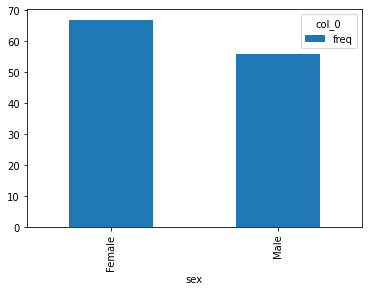

In [13]:

# Create bar diag of Diag sex
s.plot.bar()
plt.show()


il y légèrement plus de femmes que d'hommes. + 10 de femmes que d'hommes

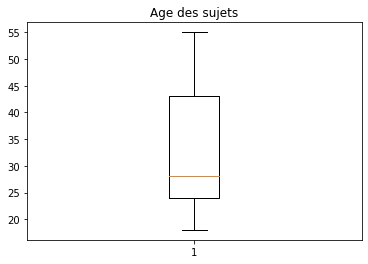

In [14]:
plt.boxplot(demo_net_spd.age)
plt.title('Age des sujets')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002927B715D90>,
      dtype=object)

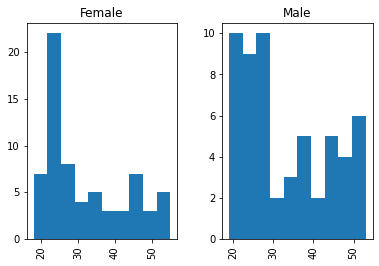

In [15]:
demo_net_spd.hist(column='age',by='sex')

la disparité des ages des hommes est plus homogène que chez les femmes. on observe un pic de 20 femmes entre 23 et 25 ans. 

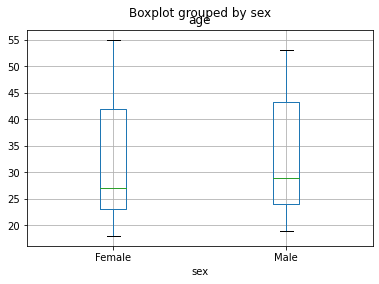

In [16]:
demo_net_spd.boxplot(column='age',by='sex')

La médiane des ages chez les femmes est à 27 ans, chez les hommes elle est à 29 ans. la population des femmes est légèrement plus jeune

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002927DA74850>,
      dtype=object)

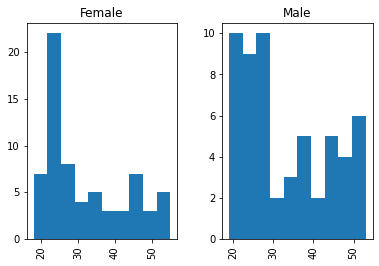

In [17]:

demo_net_spd.hist(column='age',by='sex')

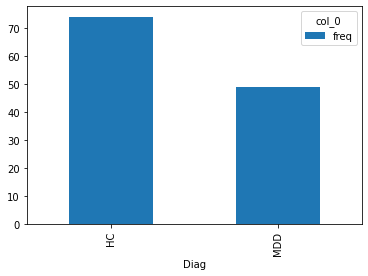

In [13]:
t.plot.bar()
plt.show()


on observe plus d'individus diagnostiqués sans dépression que d'individus souffrant de dépression.

Diag          HC       MDD
sex                       
Female  0.567164  0.432836
Male    0.642857  0.357143


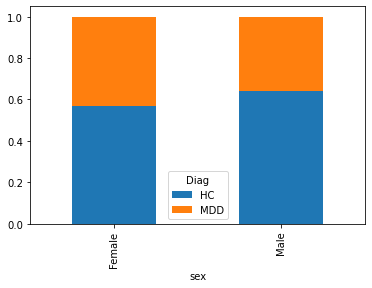

In [41]:
ct = pd.crosstab(demo_net_spd['sex'],demo_net_spd['Diag'],normalize='index')
ct.plot.bar(stacked=True)

près de la moitié des femmes est diagnostiquée en dépression. près d'1/3 des hommes est diagnostiqué en dépression

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224C688EC10>,
      dtype=object)

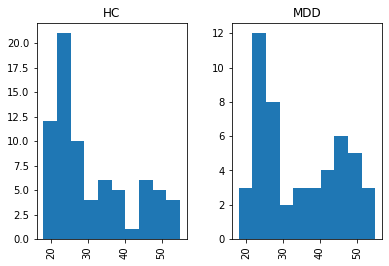

In [28]:
demo_net_spd.hist(column='age',by='Diag')

on observe plus de personnes diagnostiquées positives à partir de 40 ans, par rapport à la dispersion du groupe contrôle.

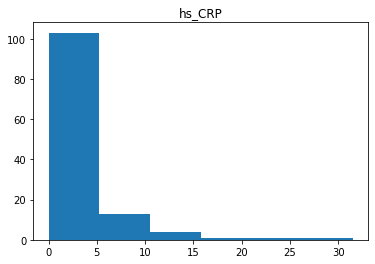

In [14]:
plt.hist(demo_net_spd.hs_CRP, bins = 6)
plt.title("hs_CRP")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224C7B972B0>,
      dtype=object)

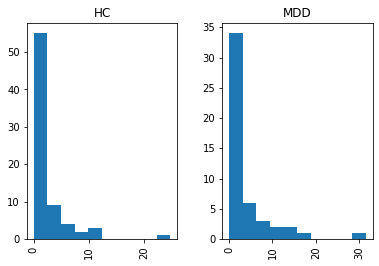

In [33]:
demo_net_spd.hist(column='hs_CRP',by='Diag')

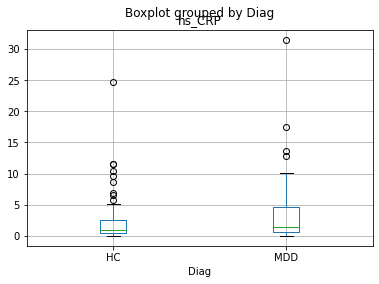

In [43]:
demo_net_spd.boxplot(column='hs_CRP',by='Diag')

Le score de hs-CRP peut être plus élevé pour les personnes diagnostiquées en dépression.

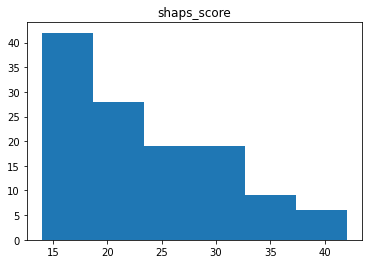

In [15]:
plt.hist(demo_net_spd.shaps_score, bins = 6)
plt.title("shaps_score")
plt.show()

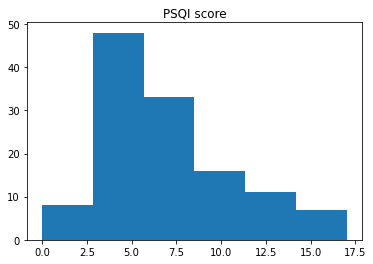

In [16]:
plt.hist(demo_net_spd.psqi_score, bins=6)
plt.title('PSQI score')
plt.show()

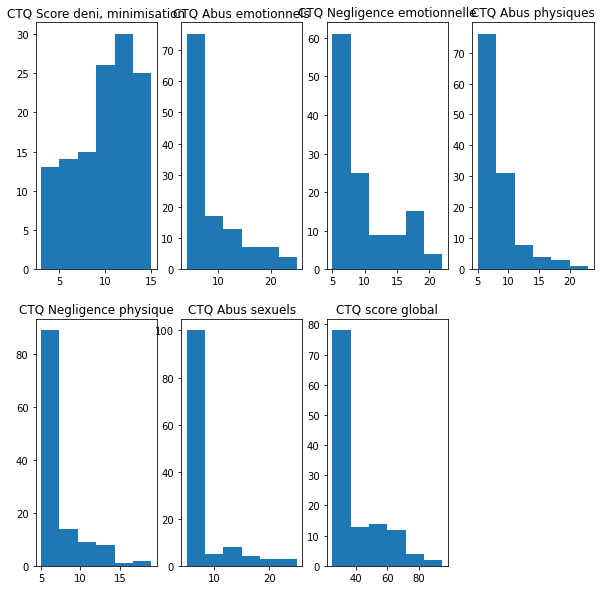

In [56]:

fig1 = plt.figure(figsize=(10,10))
ax11 = fig1.add_subplot(2,4,1)
ax21 = fig1.add_subplot(2,4,2)
ax31 = fig1.add_subplot(2,4,3)
ax41 = fig1.add_subplot(2,4,4)
ax51 = fig1.add_subplot(2,4,5)
ax61 = fig1.add_subplot(2,4,6)
ax71 = fig1.add_subplot(2,4,7)
ax11.title.set_text('CTQ Score deni, minimisation')
ax21.title.set_text('CTQ Abus emotionnels')
ax31.title.set_text('CTQ Negligence emotionnelle')
ax41.title.set_text('CTQ Abus physiques')
ax51.title.set_text('CTQ Negligence physique')
ax61.title.set_text('CTQ Abus sexuels')
ax71.title.set_text('CTQ score global')
ax11.hist(demo_net_spd.ctq_denial_score,bins = 6)
ax21.hist(demo_net_spd.ctq_emoabuse_score,bins = 6)
ax31.hist(demo_net_spd.ctq_emoneglect_score,bins = 6)
ax41.hist(demo_net_spd.ctq_physabuse_score,bins = 6)
ax51.hist(demo_net_spd.ctq_physneglect_score,bins = 6)
ax61.hist(demo_net_spd.ctq_sexabuse_score,bins = 6)
ax71.hist(demo_net_spd.ctq_score,bins = 6)
plt.show()

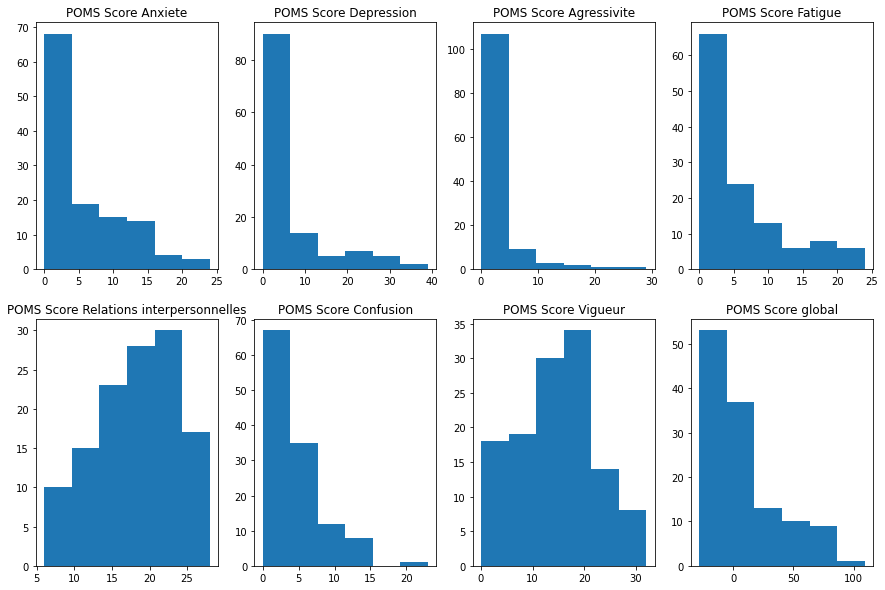

In [20]:

fig3 = plt.figure(figsize=(15,10))
ax12 = fig3.add_subplot(2,4,1)
ax22 = fig3.add_subplot(2,4,2)
ax32 = fig3.add_subplot(2,4,3)
ax42 = fig3.add_subplot(2,4,4)
ax52 = fig3.add_subplot(2,4,5)
ax62 = fig3.add_subplot(2,4,6)
ax72 = fig3.add_subplot(2,4,7)
ax82 = fig3.add_subplot(2,4,8)
ax12.title.set_text('POMS Score Anxiete')
ax22.title.set_text('POMS Score Depression')
ax32.title.set_text('POMS Score Agressivite')
ax42.title.set_text('POMS Score Fatigue')
ax52.title.set_text('POMS Score Relations interpersonnelles')
ax62.title.set_text('POMS Score Confusion')
ax72.title.set_text('POMS Score Vigueur')
ax82.title.set_text('POMS Score global')
ax12.hist(demo_net_spd.poms_score_tension,bins = 6)
ax22.hist(demo_net_spd.poms_score_depression,bins = 6)
ax32.hist(demo_net_spd.poms_score_anger,bins = 6)
ax42.hist(demo_net_spd.poms_score_fatigue,bins = 6)
ax52.hist(demo_net_spd.poms_score_friendliness,bins = 6)
ax62.hist(demo_net_spd.poms_score_confusion,bins = 6)
ax72.hist(demo_net_spd.poms_score_vigour,bins = 6)
ax82.hist(demo_net_spd.poms_score_tmd,bins = 6)
plt.show()

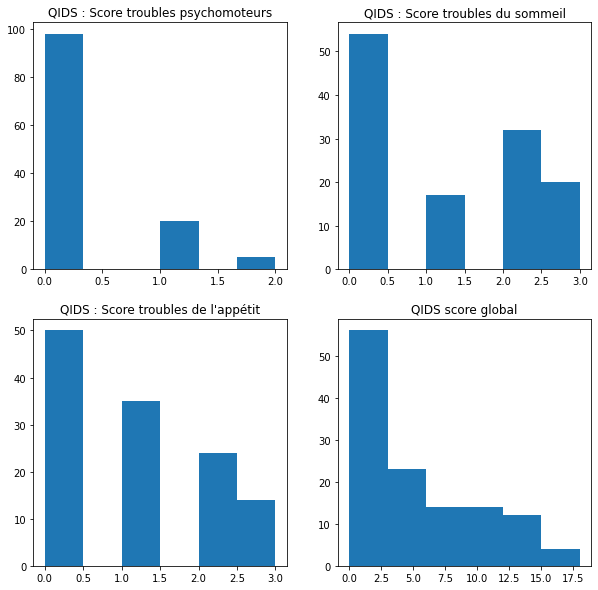

In [54]:
fig2 = plt.figure(figsize=(10,10))
ax10 = fig2.add_subplot(2,2,1)
ax20 = fig2.add_subplot(2,2,2)
ax30 = fig2.add_subplot(2,2,3)
ax40 = fig2.add_subplot(2,2,4)
ax10.title.set_text('QIDS : Score troubles psychomoteurs')
ax20.title.set_text('QIDS : Score troubles du sommeil')
ax30.title.set_text("QIDS : Score troubles de l'appétit")
ax40.title.set_text('QIDS score global')
ax10.hist(demo_net_spd.qids_psychomotor_score,bins = 6)
ax20.hist(demo_net_spd.qids_sleep_score,bins = 6)
ax30.hist(demo_net_spd.qids_appetite_score,bins = 6)
ax40.hist(demo_net_spd.qids_score,bins = 6)
plt.show()

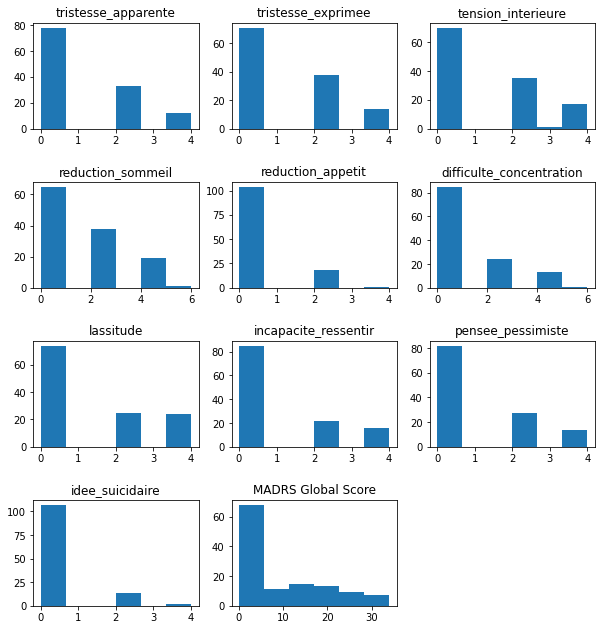

In [23]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.title.set_text('tristesse_apparente')
ax2.title.set_text('tristesse_exprimee')
ax3.title.set_text('tension_interieure')
ax4.title.set_text('reduction_sommeil')
ax5.title.set_text('reduction_appetit')
ax6.title.set_text('difficulte_concentration')
ax7.title.set_text('lassitude')
ax8.title.set_text('incapacite_ressentir')
ax9.title.set_text('pensee_pessimiste')
ax10.title.set_text('idee_suicidaire')
ax1.hist(demo_net_spd.tristesse_apparente,bins = 6)
ax2.hist(demo_net_spd.tristesse_exprimee,bins = 6)
ax3.hist(demo_net_spd.tension_interieure,bins = 6)
ax4.hist(demo_net_spd.reduction_sommeil,bins = 6)
ax5.hist(demo_net_spd.reduction_appetit,bins = 6)
ax6.hist(demo_net_spd.difficulte_concentration,bins = 6)
ax7.hist(demo_net_spd.lassitude,bins = 6)
ax8.hist(demo_net_spd.incapacite_ressentir,bins = 6)
ax9.hist(demo_net_spd.pensee_pessimiste,bins = 6)
ax10.hist(demo_net_spd.idee_suicidaire,bins = 6)
ax11 = fig.add_subplot(4,3,11)
ax11.title.set_text('MADRS Global Score')
ax11.hist(demo_net_spd.madrs_score, bins=6)
fig.subplots_adjust(left=0.12, bottom=0.11, right=0.90, top=0.92, wspace=0.2, hspace=0.5)
plt.show()


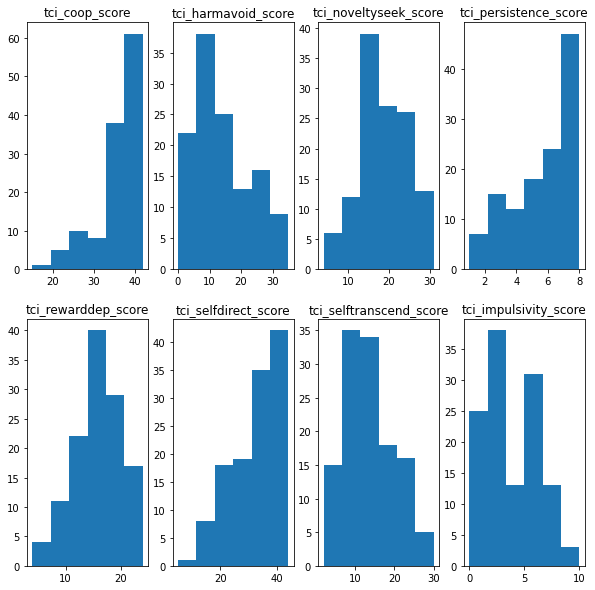

In [52]:

fag = plt.figure(figsize=(10,10))
az1 = fag.add_subplot(2,4,1)
az2 = fag.add_subplot(2,4,2)
az3 = fag.add_subplot(2,4,3)
az4 = fag.add_subplot(2,4,4)
az5 = fag.add_subplot(2,4,5)
az6 = fag.add_subplot(2,4,6)
az7 = fag.add_subplot(2,4,7)
az8 = fag.add_subplot(2,4,8)
az1.title.set_text('tci_coop_score')
az2.title.set_text('tci_harmavoid_score')
az3.title.set_text('tci_noveltyseek_score')
az4.title.set_text('tci_persistence_score')
az5.title.set_text('tci_rewarddep_score')
az6.title.set_text('tci_selfdirect_score')
az7.title.set_text('tci_selftranscend_score')
az8.title.set_text('tci_impulsivity_score')
az1.hist(demo_net_spd.tci_coop_score,bins = 6)
az2.hist(demo_net_spd.tci_harmavoid_score,bins = 6)
az3.hist(demo_net_spd.tci_noveltyseek_score,bins = 6)
az4.hist(demo_net_spd.tci_persistence_score,bins = 6)
az5.hist(demo_net_spd.tci_rewarddep_score,bins = 6)
az6.hist(demo_net_spd.tci_selfdirect_score,bins = 6)
az7.hist(demo_net_spd.tci_selftranscend_score,bins = 6)
az8.hist(demo_net_spd.tci_impulsivity_score,bins = 6)
plt.show()


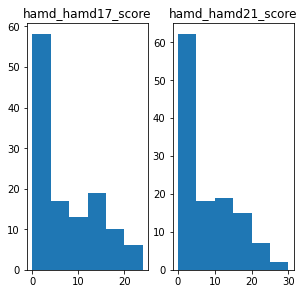

In [51]:
fog = plt.figure(figsize=(10,10))
az11 = fog.add_subplot(2,4,1)
az12 = fog.add_subplot(2,4,2)
az11.title.set_text('hamd_hamd17_score')
az12.title.set_text('hamd_hamd21_score')
az11.hist(demo_net_spd.hamd_hamd17_score,bins = 6)
az12.hist(demo_net_spd.hamd_hamd21_score,bins = 6)

plt.show()

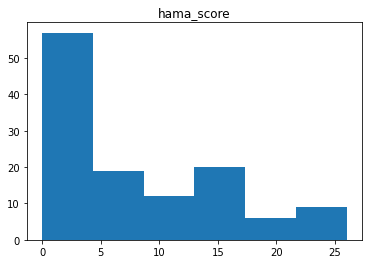

In [23]:
plt.hist(demo_net_spd.hama_score,bins = 6)
plt.title("hama_score")
plt.show()



In [71]:
#some statistics

print(demo_net_spd.describe(include='all'))

       batch         age     sex Diag      hs_CRP  shaps_score  psqi_score  \
count    123  123.000000     123  123  123.000000   123.000000  123.000000   
unique     4         NaN       2    2         NaN          NaN         NaN   
top      2nd         NaN  Female   HC         NaN          NaN         NaN   
freq      33         NaN      67   74         NaN          NaN         NaN   
mean     NaN   32.373984     NaN  NaN    3.025935    22.845528    6.894309   
std      NaN   10.812408     NaN  NaN    4.654423     7.220227    3.819306   
min      NaN   18.000000     NaN  NaN    0.000000    14.000000    0.000000   
25%      NaN   24.000000     NaN  NaN    0.500000    16.000000    4.000000   
50%      NaN   28.000000     NaN  NaN    1.300000    23.000000    6.000000   
75%      NaN   43.000000     NaN  NaN    3.350000    28.000000    9.000000   
max      NaN   55.000000     NaN  NaN   31.500000    42.000000   17.000000   

        ctq_denial_score  ctq_emoabuse_score  ctq_emoneglect_sc

Sélection de variable

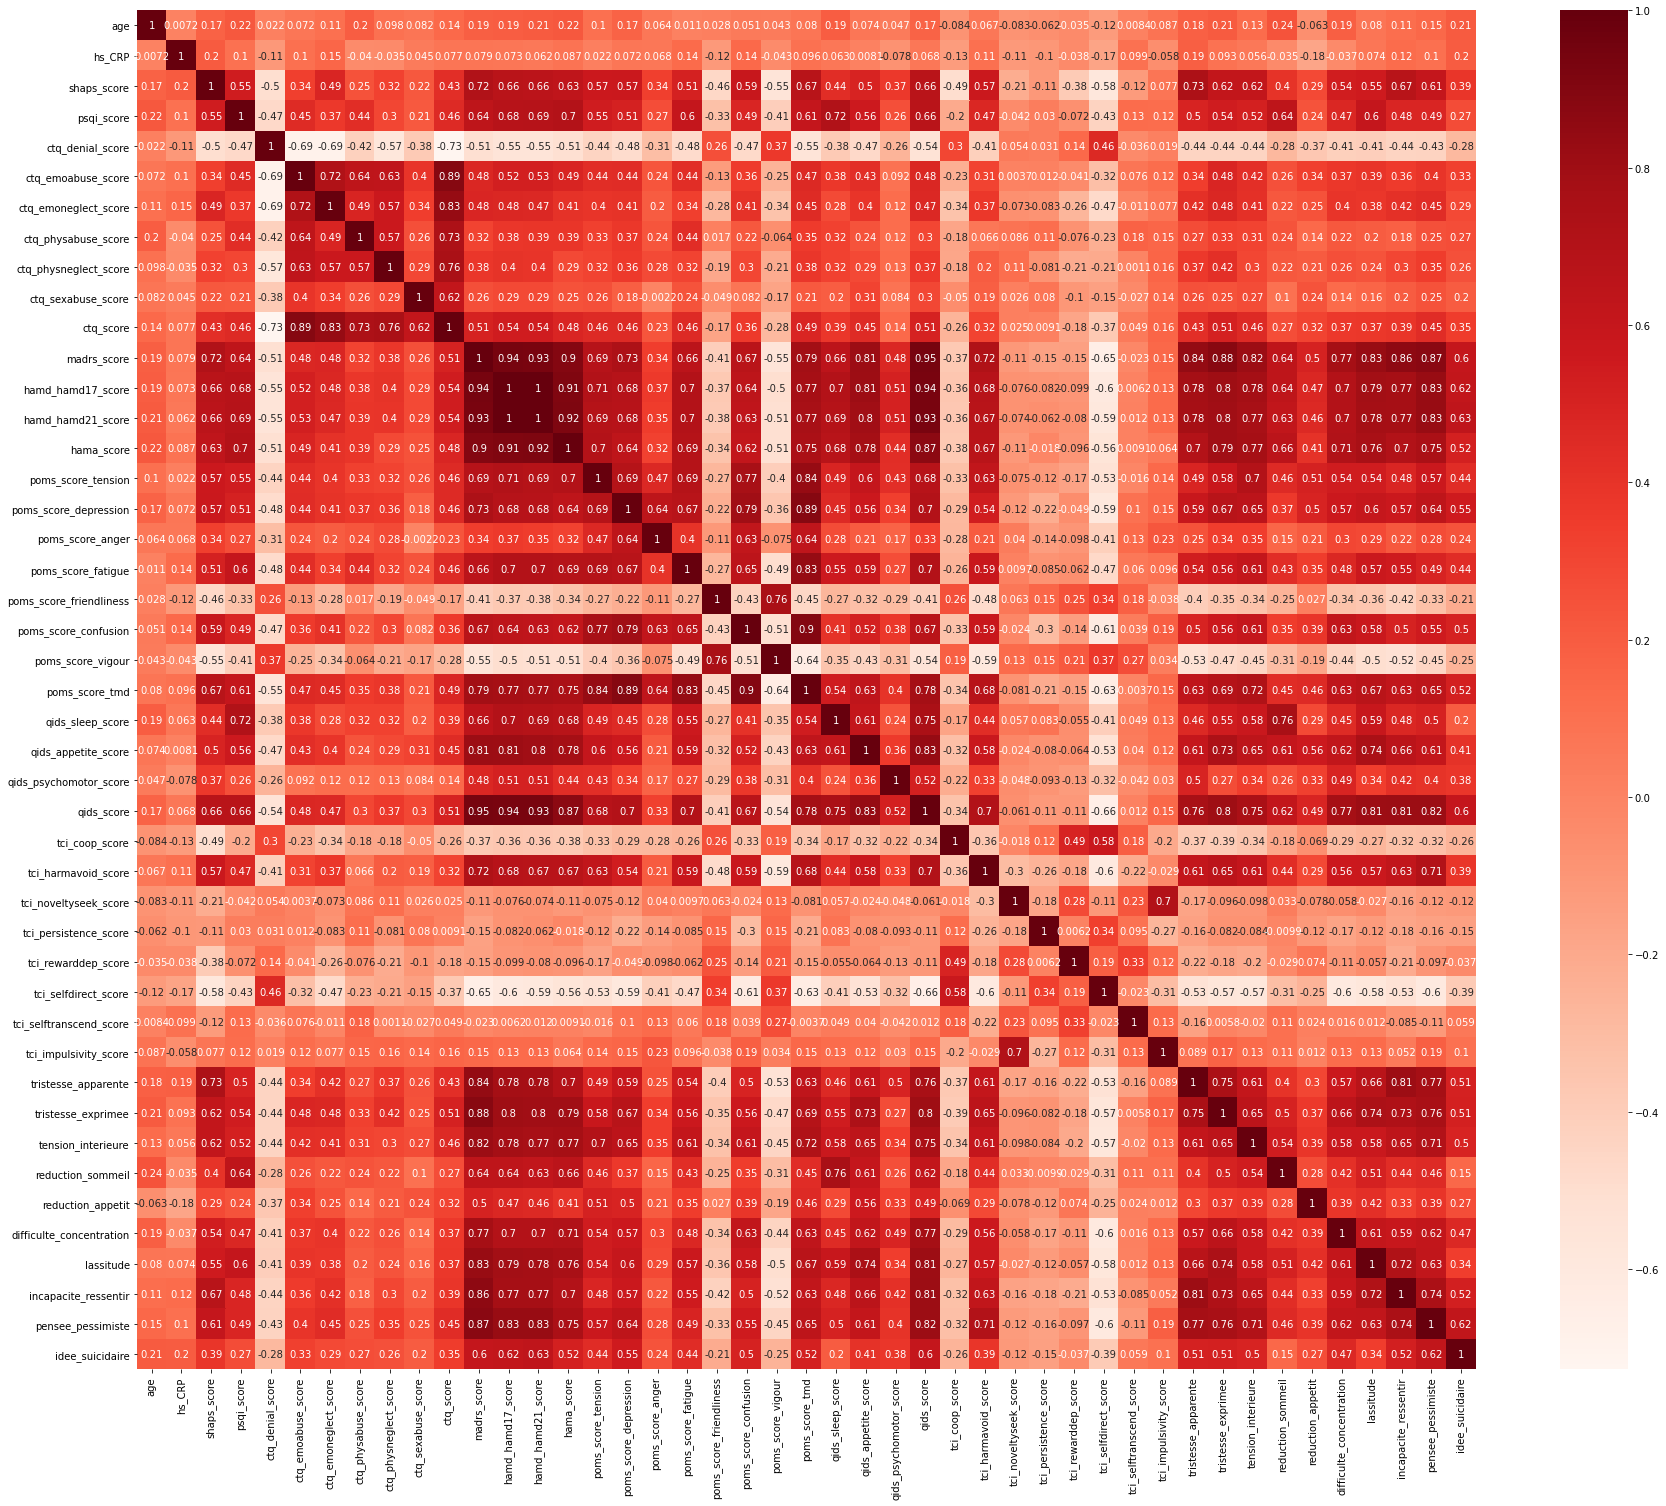

In [70]:
# matrice de corrélation
plt.figure(figsize=(30,25))
cor = demo_net_spd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
#Correlation with output variable
cor_target = abs(cor["shaps_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

shaps_score    1.000000
madrs_score    0.716578
MADRS_Q1       0.734553
Name: shaps_score, dtype: float64

In [82]:
#Correlation with output variable
cor_target = abs(cor["qids_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score                 0.945975
hamd_hamd17_score           0.936099
hamd_hamd21_score           0.933625
hama_score                  0.871623
poms_score_depression       0.700413
poms_score_tmd              0.777933
qids_sleep_score            0.746338
qids_appetite_score         0.831769
qids_score                  1.000000
tci_harmavoid_score         0.703901
tristesse_apparente         0.758791
tristesse_exprimee          0.799743
tension_interieure          0.746232
difficulte_concentration    0.773758
lassitude                   0.806249
incapacite_ressentir        0.811192
pensee_pessimiste           0.816728
Name: qids_score, dtype: float64

In [73]:
#Correlation with output variable
cor_target = abs(cor["tci_selfdirect_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

madrs_score                 0.651161
hamd_hamd17_score           0.602647
poms_score_confusion        0.614257
poms_score_tmd              0.627582
qids_score                  0.659401
tci_harmavoid_score         0.600983
tci_selfdirect_score        1.000000
difficulte_concentration    0.600431
pensee_pessimiste           0.602537
Name: tci_selfdirect_score, dtype: float64

In [84]:
#Correlation with output variable
cor_target = abs(cor["ctq_denial_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

ctq_denial_score    1.000000
ctq_score           0.727377
Name: ctq_denial_score, dtype: float64

In [118]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

In [24]:
var_quanti = demo_net_spd.drop(['batch','sex'], 1)

print(var_quanti.info())


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 46 columns):
age                         123 non-null float64
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tension          123 non-null float64
poms_score_depression       123 non-null float64
poms_score_an

c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

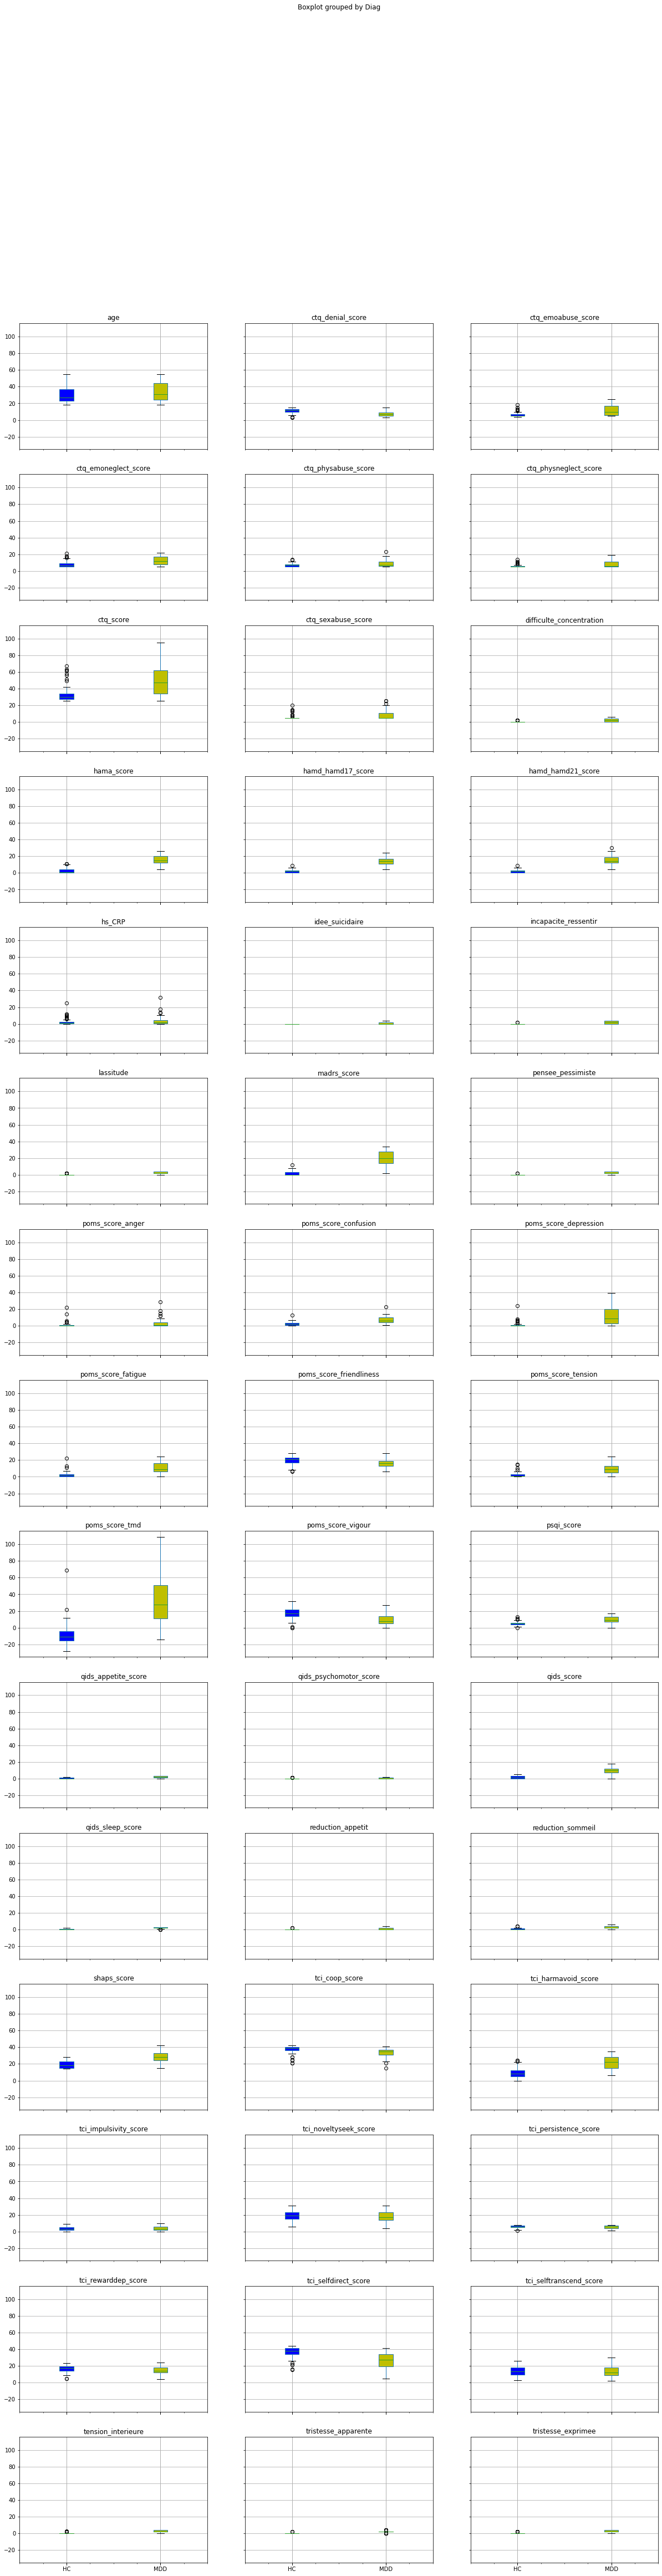

In [61]:
df = var_quanti
bp_dict = df.boxplot(
    by="Diag",layout=(20,3),figsize=(20,100),
    return_type='both',
    patch_artist = True,
)

colors = ['b', 'y', 'm', 'c', 'g', 'b', 'r', 'k', ]
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

poms : état émotionnel et dépressionnel, humeur
ctq : abus et négligence dans l'enfance
hama : anxiété
harmavoid : évitement du danger
les scores sont plus élevés et/ou plus largement répartis en MDD par rapport au groupe contrôle


In [63]:
print(demo_net_spd.info())
print(demo_net_spd.head())

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                       123 non-null object
age                         123 non-null float64
sex                         123 non-null object
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tens

MODELE DE PREDICTION

Sélection de variables / PCA

In [68]:
#créer un dummies sur toutes les variables quali
dum_all = pd.get_dummies(demo_net_spd, prefix=['col1', 'col2',"col3"])
print(dum_all)

        age  hs_CRP  shaps_score  psqi_score  ctq_denial_score  \
AA003  45.0     0.4         25.0         5.0              12.0   
AA115  44.0     6.9         16.0         5.0              10.0   
AA296  27.0     0.6         14.0         5.0              12.0   
AA328  51.0     1.6         24.0        12.0              15.0   
AA343  26.0     3.1         16.0         5.0               8.0   
...     ...     ...          ...         ...               ...   
AN293  24.0     1.4         31.0         9.0               3.0   
AN330  26.0     0.7         26.0        15.0               3.0   
AN382  25.0     0.4         27.0         8.0               9.0   
AN466  28.0    31.5         42.0         8.0               6.0   
AN965  29.0     0.3         40.0         7.0               9.0   

       ctq_emoabuse_score  ctq_emoneglect_score  ctq_physabuse_score  \
AA003                 5.0                   6.0                  7.0   
AA115                 5.0                   5.0                

pour réaliser une ACP, il faut un rapport de 3 entre n individus et p variables.
on doit conserver ainsi 41 variables max

In [70]:
print(dum_all.columns)

Index(['age', 'hs_CRP', 'shaps_score', 'psqi_score', 'ctq_denial_score',
       'ctq_emoabuse_score', 'ctq_emoneglect_score', 'ctq_physabuse_score',
       'ctq_physneglect_score', 'ctq_sexabuse_score', 'ctq_score',
       'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score', 'hama_score',
       'poms_score_tension', 'poms_score_depression', 'poms_score_anger',
       'poms_score_fatigue', 'poms_score_friendliness', 'poms_score_confusion',
       'poms_score_vigour', 'poms_score_tmd', 'qids_sleep_score',
       'qids_appetite_score', 'qids_psychomotor_score', 'qids_score',
       'tci_coop_score', 'tci_harmavoid_score', 'tci_noveltyseek_score',
       'tci_persistence_score', 'tci_rewarddep_score', 'tci_selfdirect_score',
       'tci_selftranscend_score', 'tci_impulsivity_score',
       'tristesse_apparente', 'tristesse_exprimee', 'tension_interieure',
       'reduction_sommeil', 'reduction_appetit', 'difficulte_concentration',
       'lassitude', 'incapacite_ressentir', 'pensee_pe

In [79]:
X = dum_all.drop(['hs_CRP', 'col1_1st', 'col1_2nd', 'col1_3rd', 'col1_4th',
                 'hamd_hamd21_score','idee_suicidaire','tristesse_apparente', 'tristesse_exprimee', 'tension_interieure',
       'reduction_sommeil', 'reduction_appetit', 'difficulte_concentration',
       'lassitude', 'incapacite_ressentir', 'pensee_pessimiste'],1
                )
print(X)

        age  shaps_score  psqi_score  ctq_denial_score  ctq_emoabuse_score  \
AA003  45.0         25.0         5.0              12.0                 5.0   
AA115  44.0         16.0         5.0              10.0                 5.0   
AA296  27.0         14.0         5.0              12.0                 5.0   
AA328  51.0         24.0        12.0              15.0                 5.0   
AA343  26.0         16.0         5.0               8.0                 9.0   
...     ...          ...         ...               ...                 ...   
AN293  24.0         31.0         9.0               3.0                11.0   
AN330  26.0         26.0        15.0               3.0                21.0   
AN382  25.0         27.0         8.0               9.0                16.0   
AN466  28.0         42.0         8.0               6.0                10.0   
AN965  29.0         40.0         7.0               9.0                 5.0   

       ctq_emoneglect_score  ctq_physabuse_score  ctq_physnegle

In [83]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[ 1.17250999  0.2996143  -0.49801107 ... -0.91423241  0.81373347
  -0.81373347]
 [ 1.07964539 -0.95198204 -0.49801107 ... -0.91423241  0.81373347
  -0.81373347]
 [-0.49905287 -1.23011457 -0.49801107 ...  1.09381377  0.81373347
  -0.81373347]
 ...
 [-0.68478208  0.57774682  0.29068457 ... -0.91423241 -1.22890361
   1.22890361]
 [-0.40618827  2.66374073  0.29068457 ...  1.09381377 -1.22890361
   1.22890361]
 [-0.31332366  2.38560821  0.02778603 ...  1.09381377 -1.22890361
   1.22890361]]


In [93]:
#vérification - librairie numpy
import numpy as np
#moyenne
print(np.mean(Z,axis=0))


[-9.88369278e-17  2.27460327e-16 -1.94063374e-17  1.52317183e-16
 -4.51310173e-17  1.65969316e-16 -8.66515531e-17 -8.48463125e-17
 -1.29977330e-16 -8.66515531e-17  6.13781835e-17 -9.02620345e-18
 -2.12115781e-17  1.80524069e-18 -2.52733697e-17 -1.62471662e-17
 -7.04043869e-17 -3.38482629e-17  0.00000000e+00 -9.02620345e-17
  2.16628883e-17  8.71028633e-17 -9.20672752e-17  6.13781835e-17
  1.44419255e-17  4.15205359e-17 -5.95729428e-17  3.61048138e-17
  1.26366848e-17  1.08314441e-17 -1.78718828e-16 -8.84567938e-17
  9.74829973e-17  3.61048138e-17  1.44419255e-17 -3.97152952e-17
 -5.41572207e-17]


In [94]:
#écart-type
print(np.std(Z,axis=0,ddof=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [85]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [86]:
 #calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)


37


In [87]:
 #variance expliquée
print(acp.explained_variance_)


[1.50784021e+01 3.25089612e+00 2.62244738e+00 2.27344377e+00
 1.84108319e+00 1.52421271e+00 1.20779819e+00 1.00178152e+00
 9.03059523e-01 8.63939489e-01 7.77664903e-01 6.74675824e-01
 6.09180347e-01 5.50515057e-01 4.74564937e-01 4.36940721e-01
 3.82447677e-01 3.52924157e-01 3.40287902e-01 3.17795472e-01
 2.98139190e-01 2.23057214e-01 2.05063338e-01 1.86415780e-01
 1.62951423e-01 1.56038226e-01 1.38245456e-01 1.29691237e-01
 1.10931996e-01 9.42328637e-02 5.42297370e-02 3.53021942e-02
 2.49190897e-02 2.97369048e-30 1.06417314e-31 1.06417314e-31
 1.06417314e-31]


In [99]:
#valeur corrigée
n = 123
p = 37
eigval = (n-1)/n*acp.explained_variance_
print(eigval)


[1.49558134e+01 3.22446607e+00 2.60112667e+00 2.25496048e+00
 1.82611503e+00 1.51182074e+00 1.19797869e+00 9.93636951e-01
 8.95717575e-01 8.56915590e-01 7.71342424e-01 6.69190655e-01
 6.04227661e-01 5.46039325e-01 4.70706686e-01 4.33388358e-01
 3.79338346e-01 3.50054855e-01 3.37521333e-01 3.15211769e-01
 2.95715295e-01 2.21243741e-01 2.03396156e-01 1.84900205e-01
 1.61626614e-01 1.54769623e-01 1.37121510e-01 1.28636836e-01
 1.10030110e-01 9.34667428e-02 5.37888448e-02 3.50151845e-02
 2.47164955e-02 2.94951413e-30 1.05552133e-31 1.05552133e-31
 1.05552133e-31]


In [98]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[1.49558134e+01 3.22446607e+00 2.60112667e+00 2.25496048e+00
 1.82611503e+00 1.51182074e+00 1.19797869e+00 9.93636951e-01
 8.95717575e-01 8.56915590e-01 7.71342424e-01 6.69190655e-01
 6.04227661e-01 5.46039325e-01 4.70706686e-01 4.33388358e-01
 3.79338346e-01 3.50054855e-01 3.37521333e-01 3.15211769e-01
 2.95715295e-01 2.21243741e-01 2.03396156e-01 1.84900205e-01
 1.61626614e-01 1.54769623e-01 1.37121510e-01 1.28636836e-01
 1.10030110e-01 9.34667428e-02 5.37888448e-02 3.50151845e-02
 2.47164955e-02 2.94951413e-30 1.05552133e-31 1.05552133e-31
 1.05552133e-31]


In [89]:
 #proportion de variance expliquée - axes
print(acp.explained_variance_ratio_)


[4.04211174e-01 8.71477315e-02 7.03007208e-02 6.09448780e-02
 4.93544603e-02 4.08600199e-02 3.23778025e-02 2.68550527e-02
 2.42085831e-02 2.31598808e-02 2.08470926e-02 1.80862339e-02
 1.63304773e-02 1.47578196e-02 1.27218023e-02 1.17131989e-02
 1.02523877e-02 9.46094202e-03 9.12219820e-03 8.51923700e-03
 7.99230526e-03 5.97956057e-03 5.49719342e-03 4.99730283e-03
 4.36828688e-03 4.18296278e-03 3.70598675e-03 3.47667126e-03
 2.97378676e-03 2.52612818e-03 1.45375256e-03 9.46356337e-04
 6.68013392e-04 7.97165981e-32 2.85276034e-33 2.85276034e-33
 2.85276034e-33]


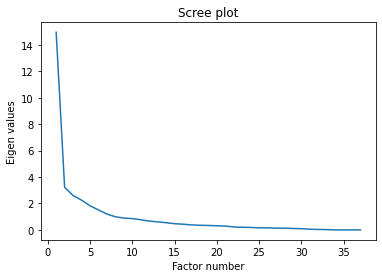

In [100]:
 #scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


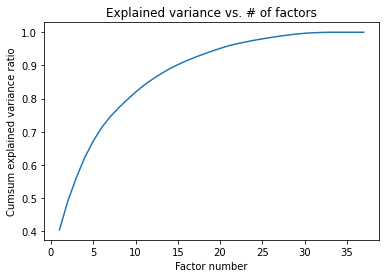

In [101]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [102]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
vp_seuil = pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})


      Val.Propre    Seuils
0   1.495581e+01  4.201586
1   3.224466e+00  3.201586
2   2.601127e+00  2.701586
3   2.254960e+00  2.368253
4   1.826115e+00  2.118253
5   1.511821e+00  1.918253
6   1.197979e+00  1.751586
7   9.936370e-01  1.608729
8   8.957176e-01  1.483729
9   8.569156e-01  1.372618
10  7.713424e-01  1.272618
11  6.691907e-01  1.181709
12  6.042277e-01  1.098376
13  5.460393e-01  1.021452
14  4.707067e-01  0.950024
15  4.333884e-01  0.883357
16  3.793383e-01  0.820857
17  3.500549e-01  0.762034
18  3.375213e-01  0.706478
19  3.152118e-01  0.653847
20  2.957153e-01  0.603847
21  2.212437e-01  0.556228
22  2.033962e-01  0.510773
23  1.849002e-01  0.467295
24  1.616266e-01  0.425628
25  1.547696e-01  0.385628
26  1.371215e-01  0.347167
27  1.286368e-01  0.310129
28  1.100301e-01  0.274415
29  9.346674e-02  0.239932
30  5.378884e-02  0.206599
31  3.501518e-02  0.174341
32  2.471650e-02  0.143091
33  2.949514e-30  0.112788
34  1.055521e-31  0.083376
35  1.055521e-31  0.054805
3